In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines


In [2]:
df_old = pd.read_csv("cmu-sleep.csv")
df_old

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544
4,174,5,lac1,1,1,0,0.130181,423.421053,368.763158,0.655172,10.526316,3.210000,4.000000,61,1.958280544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,,
630,61,2,uw1,0,1,,0.045369,477.894737,331.315789,0.678571,23.631579,3.868182,3.650000,10,-1.80457982
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123


In [3]:
#for every 7 days they skip two, could be weekends
df = df_old[df_old.frac_nights_with_data >= (5/7)]
df_nona = df.dropna()
print(f"Df with null values has {df.shape[0]} columns. Df without null values has {df_nona.shape[0]} columns.")

Df with null values has 531 columns. Df without null values has 531 columns.


In [4]:
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544
5,184,5,lac1,1,1,0,0.209483,397.400000,353.580000,0.862069,22.360000,3.200000,3.360000,60,1.783529351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,99733,4,nh,1,1,0,0.285439,324.333333,344.814815,0.900000,41.629630,3.333500,3.222167,,
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,,
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123


In [5]:
def determine_school(study):
    if study in [1, 5]:
        return "Carnegie"
    elif study in [2, 3]:
        return "Washington"
    elif study == 4:
        return "Notre Dame"
    else:
        return "Unknown"

In [6]:
df.shape[0]

531

In [7]:
df["School"] = df.study.apply(determine_school)

C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\1915610986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["School"] = df.study.apply(determine_school)


In [8]:
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,School
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859,Carnegie
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122,Carnegie
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293,Carnegie
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544,Carnegie
5,184,5,lac1,1,1,0,0.209483,397.400000,353.580000,0.862069,22.360000,3.200000,3.360000,60,1.783529351,Carnegie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,99733,4,nh,1,1,0,0.285439,324.333333,344.814815,0.900000,41.629630,3.333500,3.222167,,,Notre Dame
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,,,Notre Dame
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342,Washington
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123,Washington


In [9]:
def convert_to_hours_minutes(total_sleep_time):
    hours = int(total_sleep_time / 60)
    minutes = int(total_sleep_time % 60)
    return f"{hours}:{minutes:02d}"


In [10]:
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,School
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859,Carnegie
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122,Carnegie
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293,Carnegie
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544,Carnegie
5,184,5,lac1,1,1,0,0.209483,397.400000,353.580000,0.862069,22.360000,3.200000,3.360000,60,1.783529351,Carnegie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,99733,4,nh,1,1,0,0.285439,324.333333,344.814815,0.900000,41.629630,3.333500,3.222167,,,Notre Dame
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,,,Notre Dame
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342,Washington
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123,Washington


In [11]:
# Create bins and labels for Total Sleep
bins = [300, 330, 360, 390, 420, 450, 480, 510, 540, 570, float('inf')]
labels = ["5:00-", "5:30-", "6:00-", "6:30-", "7:00-", "7:30-", "8:00-", "8:30-", "9:00-", "9:30-"]
df['TotalSleepTime_Minutes'] = df['TotalSleepTime']
df['TotalSleep_Binned'] = pd.cut(df['TotalSleepTime_Minutes'], bins=bins, labels=labels, right=False)

C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\1057451962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSleepTime_Minutes'] = df['TotalSleepTime']
C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\1057451962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSleep_Binned'] = pd.cut(df['TotalSleepTime_Minutes'], bins=bins, labels=labels, right=False)


In [12]:
df["Total Sleep"] = df.TotalSleepTime.apply(convert_to_hours_minutes)
df["bedtime_mssd_min"] = (df.bedtime_mssd * 60)

C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\4171398244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Sleep"] = df.TotalSleepTime.apply(convert_to_hours_minutes)
C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\4171398244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedtime_mssd_min"] = (df.bedtime_mssd * 60)


In [13]:
df_carnegie = df[(df.study == 1) | (df.study == 5)]
df_washington = df[(df.study == 2) | (df.study == 3)]
df_notre = df[(df.study == 4)]

(0.0, 150.0)

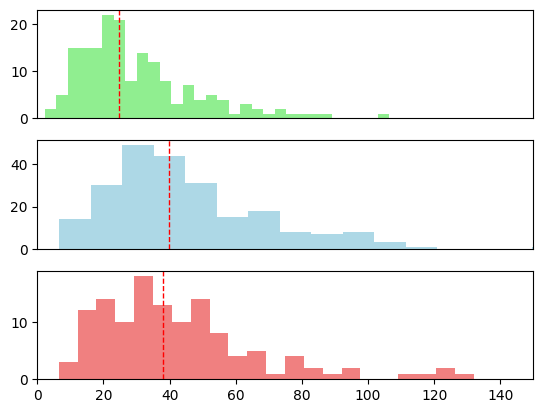

In [14]:
median_carnegie = df_carnegie.daytime_sleep.median()
median_washington = df_washington.daytime_sleep.median()
median_notre = df_notre.daytime_sleep.median()

fig, axs = plt.subplots(3)
axs[0].hist(x = df_carnegie.daytime_sleep, bins = 30, color = "lightgreen")
axs[0].axvline(median_carnegie, color='r', linestyle='dashed', linewidth=1)
axs[0].set_xlim(0, 150)
axs[0].set_xticks([])

axs[1].hist(x = df_washington.daytime_sleep, bins = 30, color = "lightblue")
axs[1].axvline(median_washington, color='r', linestyle='dashed', linewidth=1)
axs[1].set_xlim(0, 150)
axs[1].set_xticks([])

axs[2].hist(x = df_notre.daytime_sleep, bins = 30, color = "lightcoral")
axs[2].axvline(median_notre, color='r', linestyle='dashed', linewidth=1)
axs[2].set_xlim(0, 150)

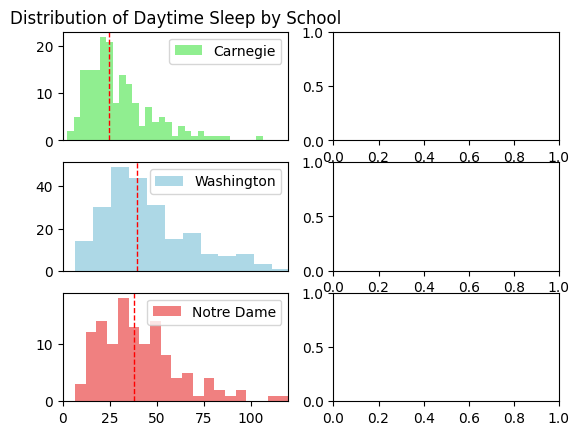

In [15]:
median_carnegie = df_carnegie.daytime_sleep.median()
median_washington = df_washington.daytime_sleep.median()
median_notre = df_notre.daytime_sleep.median()

fig, axs = plt.subplots(3, 2)
axs[0, 0].hist(x = df_carnegie.daytime_sleep, bins = 30, color = "lightgreen", label='Carnegie')
axs[0, 0].axvline(median_carnegie, color='r', linestyle='dashed', linewidth=1)
axs[0, 0].set_xlim(0, 120)
axs[0, 0].set_xticks([])
axs[0, 0].legend()
axs[0, 0].set_title("Distribution of Daytime Sleep by School")


axs[1, 0].hist(x = df_washington.daytime_sleep, bins = 30, color = "lightblue", label = "Washington")
axs[1, 0].axvline(median_washington, color='r', linestyle='dashed', linewidth=1)
axs[1, 0].set_xlim(0, 120)
axs[1, 0].set_xticks([])
axs[1, 0].legend()


axs[2, 0].hist(x = df_notre.daytime_sleep, bins = 30, color = "lightcoral", label = "Notre Dame")
axs[2, 0].axvline(median_notre, color='r', linestyle='dashed', linewidth=1)
axs[2, 0].set_xlim(0, 120)
axs[2, 0].legend()


Similarities:
All are right skewed with naptime, but some of them have inconsistent distributions.

Differences:  
  
Carnegie: standard right skewed distribution with a big gap close to the median  
Washington: standard right skewed distribution, not many errors if any  
Notre Dame: lots of big jumps in the bulk of the distribution towards the left, data seems a little inconsistent

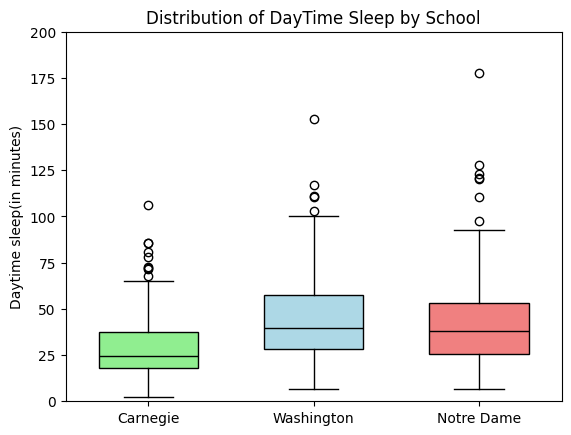

In [16]:
boxplots = plt.boxplot([df_carnegie.daytime_sleep, df_washington.daytime_sleep, df_notre.daytime_sleep], 
                       positions=[1, 2, 3], widths=0.6, patch_artist = True, medianprops=dict(color='black'))
plt.xticks(ticks=[1, 2, 3], labels=['Carnegie', 'Washington', 'Notre Dame'])
plt.title("Distribution of DayTime Sleep by School")
plt.ylabel("Daytime sleep(in minutes)")
plt.ylim(0, 200)

colors = ["lightgreen", "lightblue", "lightcoral"]
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

In [17]:
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,School,TotalSleepTime_Minutes,TotalSleep_Binned,Total Sleep,bedtime_mssd_min
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859,Carnegie,432.200000,7:00-,7:12,7.003617
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122,Carnegie,391.931035,6:30-,6:31,8.500850
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293,Carnegie,344.304348,5:30-,5:44,91.757369
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544,Carnegie,392.620690,6:30-,6:32,7.808907
5,184,5,lac1,1,1,0,0.209483,397.400000,353.580000,0.862069,22.360000,3.200000,3.360000,60,1.783529351,Carnegie,397.400000,6:30-,6:37,12.568981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,99733,4,nh,1,1,0,0.285439,324.333333,344.814815,0.900000,41.629630,3.333500,3.222167,,,Notre Dame,324.333333,5:00-,5:24,17.126356
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,,,Notre Dame,383.448276,6:00-,6:23,5.479507
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342,Washington,407.153846,6:30-,6:47,4.525760
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123,Washington,397.125000,6:30-,6:37,12.017360


C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\4076847157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='School', y='daytime_sleep', data= df, palette=['lightgreen', 'lightblue', 'lightcoral'])


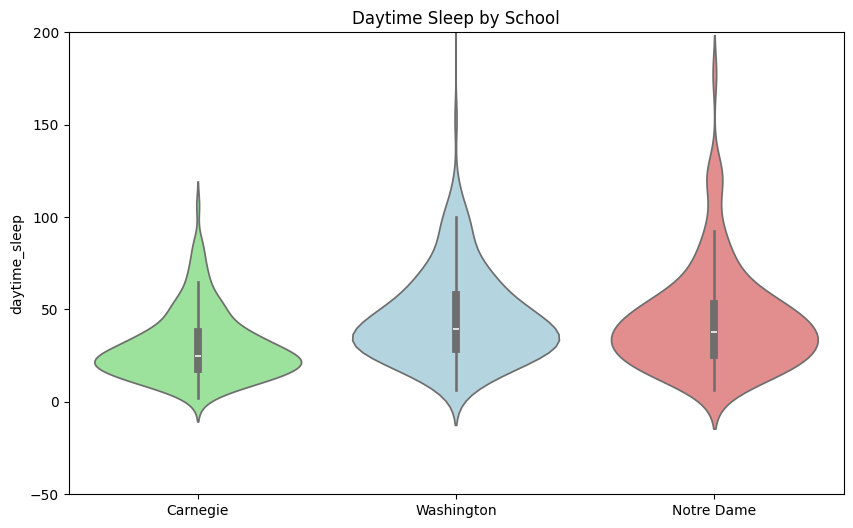

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='School', y='daytime_sleep', data= df, palette=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Daytime Sleep by School')
plt.xlabel("")
plt.ylim(-50, 200)
plt.show()

In [19]:
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,School,TotalSleepTime_Minutes,TotalSleep_Binned,Total Sleep,bedtime_mssd_min
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859,Carnegie,432.200000,7:00-,7:12,7.003617
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122,Carnegie,391.931035,6:30-,6:31,8.500850
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293,Carnegie,344.304348,5:30-,5:44,91.757369
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544,Carnegie,392.620690,6:30-,6:32,7.808907
5,184,5,lac1,1,1,0,0.209483,397.400000,353.580000,0.862069,22.360000,3.200000,3.360000,60,1.783529351,Carnegie,397.400000,6:30-,6:37,12.568981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,99733,4,nh,1,1,0,0.285439,324.333333,344.814815,0.900000,41.629630,3.333500,3.222167,,,Notre Dame,324.333333,5:00-,5:24,17.126356
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,,,Notre Dame,383.448276,6:00-,6:23,5.479507
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342,Washington,407.153846,6:30-,6:47,4.525760
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123,Washington,397.125000,6:30-,6:37,12.017360


Carnegie: smaller median, with lower IQR, frequency of data is where it should be  
  
Washington: median is equal to that of notre dame, a higher IQR while a good portion of data exists beyond the IQR which is a bit odd; however, not too concerinning and the bulk of data is still close to the median  
  
Notre Dame: Very odd how outliers and data past the IQR has a fair amount of data, why are there so many outliers?

In [20]:
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,School,TotalSleepTime_Minutes,TotalSleep_Binned,Total Sleep,bedtime_mssd_min
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859,Carnegie,432.200000,7:00-,7:12,7.003617
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122,Carnegie,391.931035,6:30-,6:31,8.500850
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293,Carnegie,344.304348,5:30-,5:44,91.757369
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544,Carnegie,392.620690,6:30-,6:32,7.808907
5,184,5,lac1,1,1,0,0.209483,397.400000,353.580000,0.862069,22.360000,3.200000,3.360000,60,1.783529351,Carnegie,397.400000,6:30-,6:37,12.568981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,99733,4,nh,1,1,0,0.285439,324.333333,344.814815,0.900000,41.629630,3.333500,3.222167,,,Notre Dame,324.333333,5:00-,5:24,17.126356
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,,,Notre Dame,383.448276,6:00-,6:23,5.479507
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342,Washington,407.153846,6:30-,6:47,4.525760
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123,Washington,397.125000,6:30-,6:37,12.017360


C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\1074186607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_mdpt_time'] = pd.cut(df['midpoint_sleep'], bins=bins, labels=labels)


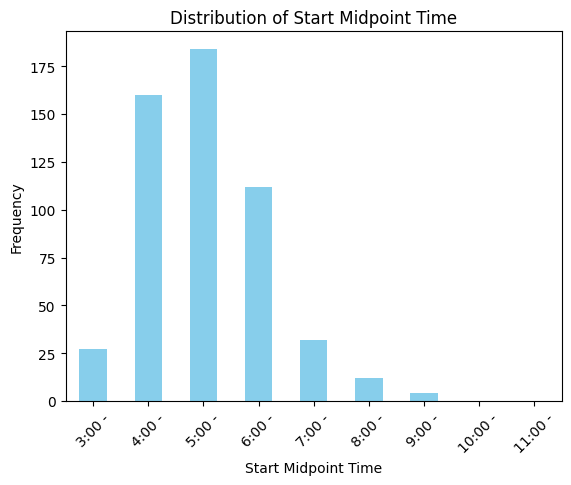

In [21]:
# Define the bin edges
bins = [240, 300, 360, 420, 480, 540, 600, 660, 720, 780]
labels = ["3:00 -", "4:00 -", "5:00 -", "6:00 -", "7:00 -", "8:00 -", "9:00 -", "10:00 -", "11:00 -"]

# Create the histogram
df['start_mdpt_time'] = pd.cut(df['midpoint_sleep'], bins=bins, labels=labels)
df['start_mdpt_time'].value_counts(sort=False).plot(kind='bar', color='skyblue')

# Set the x-axis labels
plt.xlabel('Start Midpoint Time')
plt.ylabel('Frequency')
plt.title('Distribution of Start Midpoint Time')
plt.xticks(rotation=45)
plt.show()

In [22]:
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,...,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,School,TotalSleepTime_Minutes,TotalSleep_Binned,Total Sleep,bedtime_mssd_min,start_mdpt_time
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,...,3.000000,3.380000,73,4.055294859,Carnegie,432.200000,7:00-,7:12,7.003617,6:00 -
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,...,3.660000,2.600000,64,2.482534122,Carnegie,391.931035,6:30-,6:31,8.500850,5:00 -
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,...,3.570000,3.070000,63,2.30778293,Carnegie,344.304348,5:30-,5:44,91.757369,8:00 -
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,...,3.610000,3.560000,61,1.958280544,Carnegie,392.620690,6:30-,6:32,7.808907,5:00 -
5,184,5,lac1,1,1,0,0.209483,397.400000,353.580000,0.862069,...,3.200000,3.360000,60,1.783529351,Carnegie,397.400000,6:30-,6:37,12.568981,4:00 -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,99733,4,nh,1,1,0,0.285439,324.333333,344.814815,0.900000,...,3.333500,3.222167,,,Notre Dame,324.333333,5:00-,5:24,17.126356,4:00 -
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,...,3.722167,3.611333,,,Notre Dame,383.448276,6:00-,6:23,5.479507,5:00 -
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,...,3.727272,3.600000,15,0.373361342,Washington,407.153846,6:30-,6:47,4.525760,5:00 -
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,...,3.337500,3.538461,13,-0.497815123,Washington,397.125000,6:30-,6:37,12.017360,7:00 -


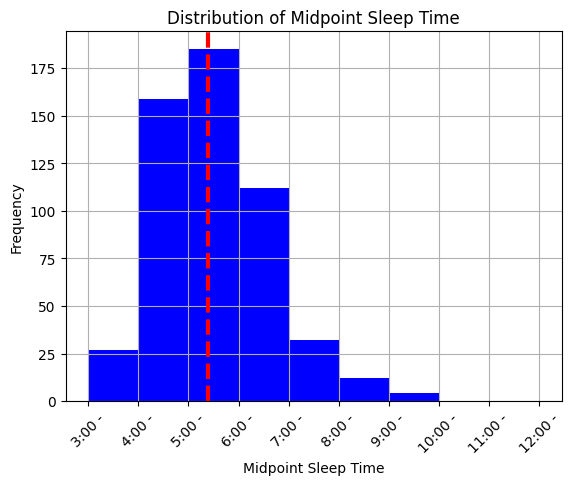

In [23]:
hist_labels = ["3:00 -", "4:00 -", "5:00 -", "6:00 -", "7:00 -", "8:00 -", "9:00 -", "10:00 -", "11:00 -", "12:00 -"]
median_mdpt = df.midpoint_sleep.median()
df["midpoint_sleep"].hist(bins = bins, color = "blue")
plt.xlabel('Midpoint Sleep Time')
plt.ylabel('Frequency')
plt.axvline(median_mdpt, color='r', linestyle='dashed', linewidth=3)
plt.title('Distribution of Midpoint Sleep Time')
plt.xticks(bins, hist_labels, rotation=45)
plt.show()

Carnegie mellon has a much higher median midpoint sleep time, slightly right skewed  

Washington is also slightly skewed as well, seemingly more skewed based on mean and median difference, has similar center with notre Dame  

Notre Dame is the most normal looking distribution for midpoint sleep, seemingly more accurate

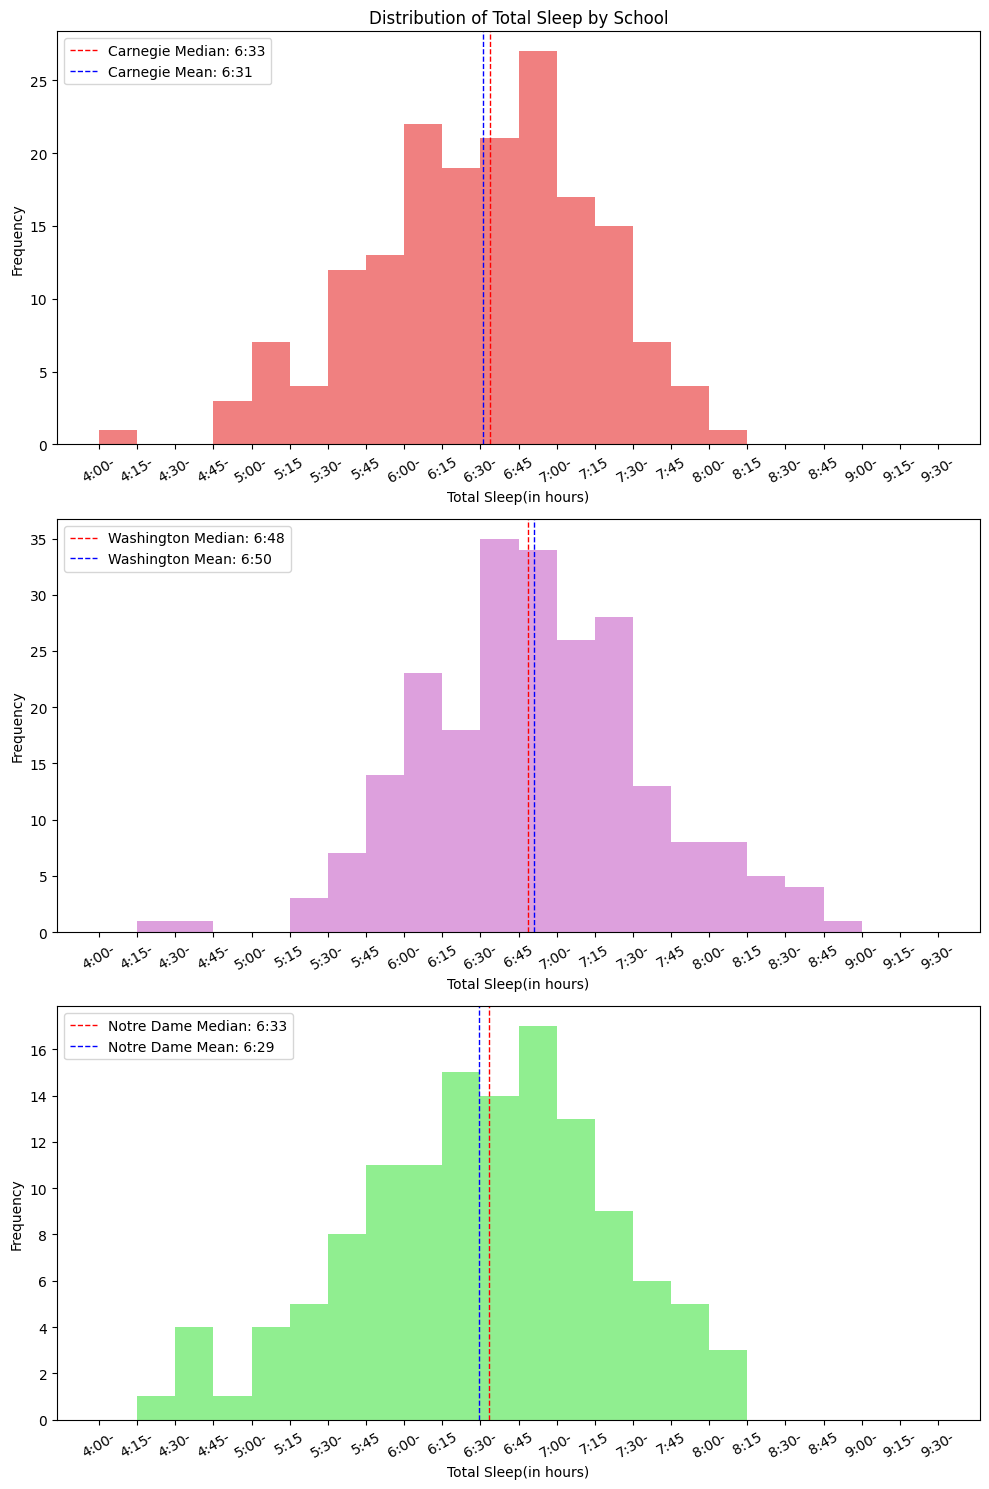

In [24]:
# Calculate medians
tot_med_carn = round(df_carnegie.TotalSleepTime.median(), 2)
tot_med_wash = round(df_washington.TotalSleepTime.median(), 2)
tot_med_notre = round(df_notre.TotalSleepTime.median(), 2)

# Calculate means
tot_mean_carn = round(df_carnegie.TotalSleepTime.mean(), 2)
tot_mean_wash = round(df_washington.TotalSleepTime.mean(), 2)
tot_mean_notre = round(df_notre.TotalSleepTime.mean(), 2)

# Create bins and labels for every 15 minutes
bins = [240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570]
labels = ["4:00-", "4:15-", "4:30-", "4:45-", "5:00-", "5:15", "5:30-", "5:45", "6:00-", "6:15", "6:30-", "6:45", "7:00-", "7:15", "7:30-", "7:45","8:00-", "8:15", "8:30-", "8:45", "9:00-", "9:15-", "9:30-"]


# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # Adjust figsize for larger plots

# Carnegie histogram
axs[0].hist(x=df_carnegie.TotalSleepTime, bins=bins, color="lightcoral", label='Carnegie')
med_line_carn = axs[0].axvline(tot_med_carn, color='r', linestyle='dashed', linewidth=1)
mean_line_carn = axs[0].axvline(tot_mean_carn, color='b', linestyle='dashed', linewidth=1)
axs[0].set_title("Distribution of Total Sleep by School")
axs[0].set_xticks(bins)
axs[0].set_xticklabels(labels, rotation=30)
axs[0].set_xlabel("Total Sleep(in hours)")
axs[0].set_ylabel("Frequency")

# Washington histogram
axs[1].hist(x=df_washington.TotalSleepTime, bins=bins, color="plum", label="Washington")
med_line_wash = axs[1].axvline(tot_med_wash, color='r', linestyle='dashed', linewidth=1)
mean_line_wash = axs[1].axvline(tot_mean_wash, color='b', linestyle='dashed', linewidth=1)
axs[1].set_xticks(bins)
axs[1].set_xticklabels(labels, rotation = 30)
axs[1].set_xlabel("Total Sleep(in hours)")
axs[1].set_ylabel("Frequency")

# Notre Dame histogram
axs[2].hist(x=df_notre.TotalSleepTime, bins=bins, color="lightgreen", label="Notre Dame")
med_line_notre = axs[2].axvline(tot_med_notre, color='r', linestyle='dashed', linewidth=1)
mean_line_notre = axs[2].axvline(tot_mean_notre, color='b', linestyle='dashed', linewidth=1)
axs[2].set_xticks(bins)
axs[2].set_xticklabels(labels, rotation = 30)
axs[2].set_xlabel("Total Sleep(in hours)")
axs[2].set_ylabel("Frequency")

# Add legends
axs[0].legend([med_line_carn, mean_line_carn], [f'Carnegie Median: {convert_to_hours_minutes(tot_med_carn)}', f'Carnegie Mean: {convert_to_hours_minutes(tot_mean_carn)}'], prop={"size": 10}, loc="upper left")

axs[1].legend([med_line_wash, mean_line_wash], [f'Washington Median: {convert_to_hours_minutes(tot_med_wash)}', f'Washington Mean: {convert_to_hours_minutes(tot_mean_wash)}'], prop={"size": 10}, loc="upper left")

axs[2].legend([med_line_carn, mean_line_notre], [f'Notre Dame Median: {convert_to_hours_minutes(tot_med_notre)}', f'Notre Dame Mean: {convert_to_hours_minutes(tot_mean_notre)}'], prop={"size": 10}, loc="upper left")


# Adjust layout
plt.tight_layout()
plt.show()


In [25]:
df_washington

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,School,TotalSleepTime_Minutes,TotalSleep_Binned,Total Sleep,bedtime_mssd_min
131,538,3,uw2,1,0,2,0.032421,402.964286,294.803571,1.000000,23.392857,3.552759,3.270000,18,1.603330987,Washington,402.964286,6:30-,6:42,1.945268
135,6,2,uw1,1,1,1,0.138198,406.884615,358.865385,0.928571,39.384615,3.426666,3.476923,13,-0.497815123,Washington,406.884615,6:30-,6:46,8.291893
137,32,2,uw1,1,1,1,0.062151,405.214286,363.250000,1.000000,39.571429,3.180000,3.500000,10,-1.80457982,Washington,405.214286,6:30-,6:45,3.729058
138,33,2,uw1,1,1,1,0.110144,396.500000,410.767857,1.000000,75.607143,2.566666,2.992307,13,-0.497815123,Washington,396.500000,6:30-,6:36,6.608619
140,37,2,uw1,1,1,1,0.048181,434.000000,343.321429,1.000000,8.642857,3.700000,3.192857,14,-0.06222689,Washington,434.000000,7:00-,7:14,2.890878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,550,3,uw2,1,0,0,0.123336,399.107143,366.678571,1.000000,47.785714,3.553214,3.540000,13,-1.000208817,Washington,399.107143,6:30-,6:39,7.400183
489,552,3,uw2,1,0,0,0.143658,429.230769,405.096154,0.928571,45.576923,3.713929,3.190000,13,-1.000208817,Washington,429.230769,7:00-,7:09,8.619493
490,561,3,uw2,1,0,0,0.168621,445.269231,382.557692,0.928571,25.153846,3.535312,2.970000,15,0.041207105,Washington,445.269231,7:00-,7:25,10.117280
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342,Washington,407.153846,6:30-,6:47,4.525760


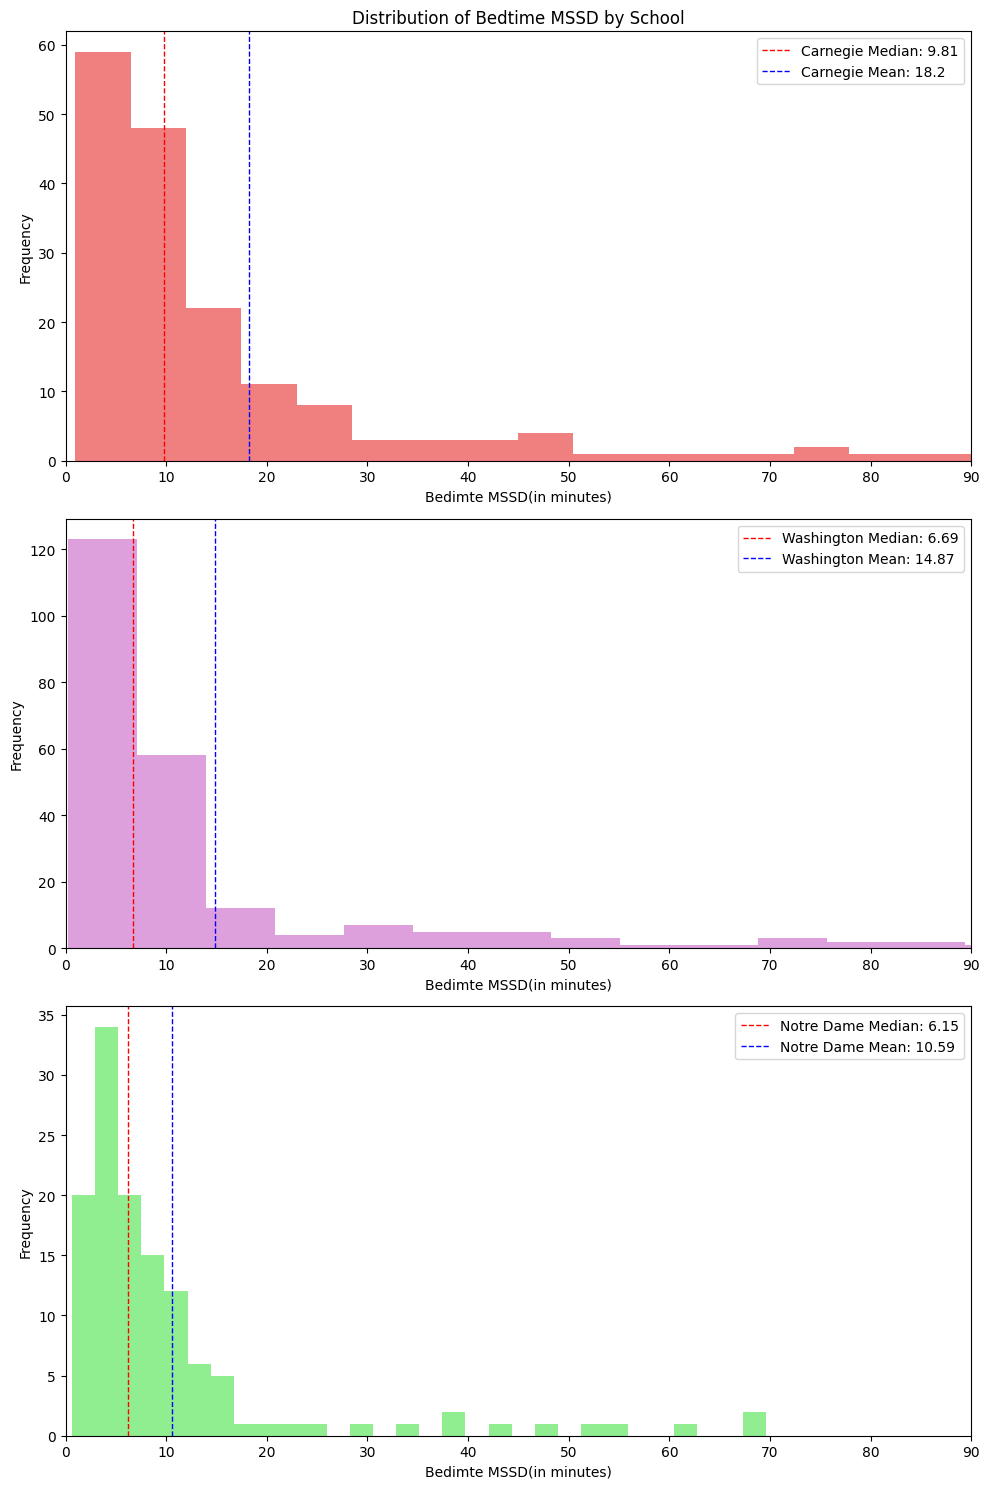

In [26]:
# Calculate medians
tot_med_carn = round(df_carnegie.bedtime_mssd_min.median(), 2)
tot_med_wash = round(df_washington.bedtime_mssd_min.median(), 2)
tot_med_notre = round(df_notre.bedtime_mssd_min.median(), 2)

# Calculate means
tot_mean_carn = round(df_carnegie.bedtime_mssd_min.mean(), 2)
tot_mean_wash = round(df_washington.bedtime_mssd_min.mean(), 2)
tot_mean_notre = round(df_notre.bedtime_mssd_min.mean(), 2)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # Adjust figsize for larger plots

# Carnegie histogram
axs[0].hist(x=df_carnegie.bedtime_mssd_min, bins=30, color="lightcoral", label='Carnegie')
med_line_carn = axs[0].axvline(tot_med_carn, color='r', linestyle='dashed', linewidth=1)
mean_line_carn = axs[0].axvline(tot_mean_carn, color='b', linestyle='dashed', linewidth=1)
axs[0].set_title("Distribution of Bedtime MSSD by School")
axs[0].set_xlim(0, 90)
axs[0].set_xlabel("Bedimte MSSD(in minutes)")
axs[0].set_ylabel("Frequency")

# Washington histogram
axs[1].hist(x=df_washington.bedtime_mssd_min, bins=30, color="plum", label="Washington")
med_line_wash = axs[1].axvline(tot_med_wash, color='r', linestyle='dashed', linewidth=1)
mean_line_wash = axs[1].axvline(tot_mean_wash, color='b', linestyle='dashed', linewidth=1)
axs[1].set_xlim(0, 90)
axs[1].set_xlabel("Bedimte MSSD(in minutes)")
axs[1].set_ylabel("Frequency")

# Notre Dame histogram
axs[2].hist(x=df_notre.bedtime_mssd_min, bins=30, color="lightgreen", label="Notre Dame")
med_line_notre = axs[2].axvline(tot_med_notre, color='r', linestyle='dashed', linewidth=1)
mean_line_notre = axs[2].axvline(tot_mean_notre, color='b', linestyle='dashed', linewidth=1)
axs[2].set_xlim(0, 90)
axs[2].set_xlabel("Bedimte MSSD(in minutes)")
axs[2].set_ylabel("Frequency")

# Add legends
axs[0].legend([med_line_carn, mean_line_carn], [f'Carnegie Median: {(tot_med_carn)}', f'Carnegie Mean: {(tot_mean_carn)}'], prop={"size": 10}, loc="upper right")

axs[1].legend([med_line_wash, mean_line_wash], [f'Washington Median: {(tot_med_wash)}', f'Washington Mean: {(tot_mean_wash)}'], prop={"size": 10}, loc="upper right")

axs[2].legend([med_line_carn, mean_line_notre], [f'Notre Dame Median: {(tot_med_notre)}', f'Notre Dame Mean: {(tot_mean_notre)}'], prop={"size": 10}, loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()





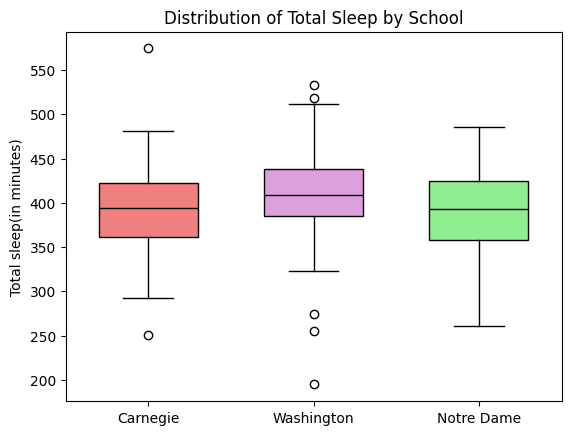

In [27]:
boxplots = plt.boxplot([df_carnegie.TotalSleepTime, df_washington.TotalSleepTime, df_notre.TotalSleepTime], 
                       positions=[1, 2, 3], widths=0.6, patch_artist = True, medianprops=dict(color='black'))
plt.xticks(ticks=[1, 2, 3], labels=['Carnegie', 'Washington', 'Notre Dame'])
plt.title("Distribution of Total Sleep by School")
plt.ylabel("Total sleep(in minutes)")

colors = ["lightcoral", "plum", "lightgreen"]
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)


C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\2820861917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='School', y='TotalSleepTime', data= df, palette=['lightcoral', 'plum', 'lightgreen'])


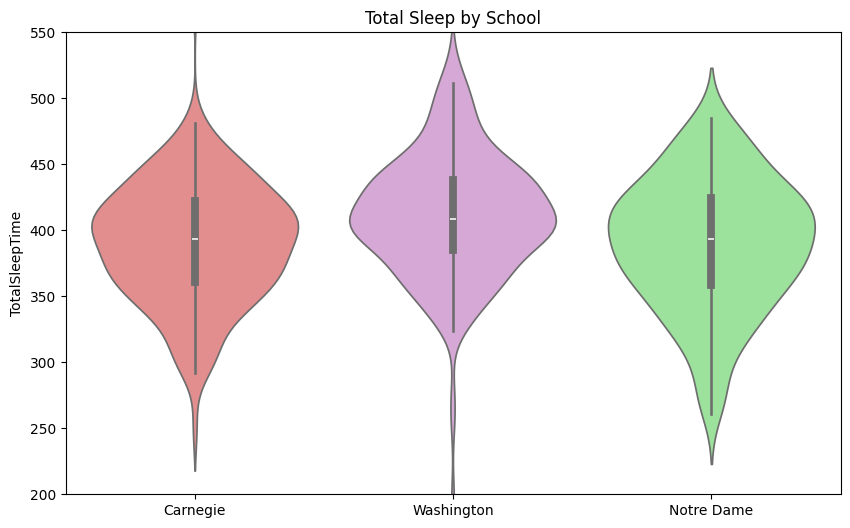

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='School', y='TotalSleepTime', data= df, palette=['lightcoral', 'plum', 'lightgreen'])
plt.title('Total Sleep by School')
plt.xlabel("")
plt.ylim(200, 550)
plt.show()

In [29]:
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,...,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,School,TotalSleepTime_Minutes,TotalSleep_Binned,Total Sleep,bedtime_mssd_min,start_mdpt_time
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,...,3.000000,3.380000,73,4.055294859,Carnegie,432.200000,7:00-,7:12,7.003617,6:00 -
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,...,3.660000,2.600000,64,2.482534122,Carnegie,391.931035,6:30-,6:31,8.500850,5:00 -
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,...,3.570000,3.070000,63,2.30778293,Carnegie,344.304348,5:30-,5:44,91.757369,8:00 -
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,...,3.610000,3.560000,61,1.958280544,Carnegie,392.620690,6:30-,6:32,7.808907,5:00 -
5,184,5,lac1,1,1,0,0.209483,397.400000,353.580000,0.862069,...,3.200000,3.360000,60,1.783529351,Carnegie,397.400000,6:30-,6:37,12.568981,4:00 -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,99733,4,nh,1,1,0,0.285439,324.333333,344.814815,0.900000,...,3.333500,3.222167,,,Notre Dame,324.333333,5:00-,5:24,17.126356,4:00 -
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,...,3.722167,3.611333,,,Notre Dame,383.448276,6:00-,6:23,5.479507,5:00 -
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,...,3.727272,3.600000,15,0.373361342,Washington,407.153846,6:30-,6:47,4.525760,5:00 -
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,...,3.337500,3.538461,13,-0.497815123,Washington,397.125000,6:30-,6:37,12.017360,7:00 -


<Axes: >

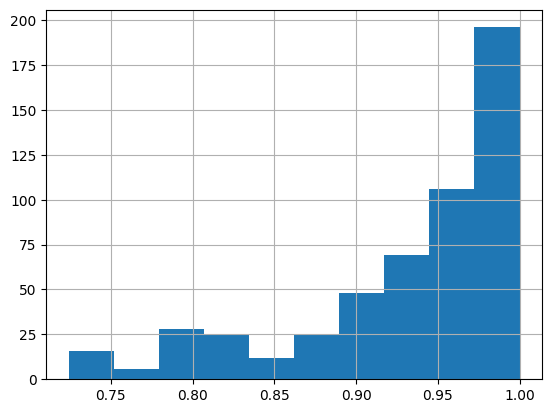

In [30]:
df["frac_nights_with_data"].hist()

In [38]:
df[df.gpa_bins.isna()]

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,...,term_gpa,term_units,Zterm_units_ZofZ,School,TotalSleepTime_Minutes,TotalSleep_Binned,Total Sleep,bedtime_mssd_min,start_mdpt_time,gpa_bins
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,...,2.600000,64,2.482534122,Carnegie,391.931035,6:30-,6:31,8.500850,5:00 -,NaN
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,...,3.070000,63,2.30778293,Carnegie,344.304348,5:30-,5:44,91.757369,8:00 -,NaN
6,255,5,lac1,1,1,0,0.675489,348.592593,434.703704,0.931034,...,3.190000,60,1.783529351,Carnegie,348.592593,5:30-,5:48,40.529339,6:00 -,NaN
9,137,5,lac1,1,1,0,0.085000,308.965517,334.793103,1.000000,...,2.550000,59,1.608778158,Carnegie,308.965517,5:00-,5:08,5.100021,4:00 -,NaN
15,125,5,lac1,1,0,1,0.246897,366.758621,431.672414,1.000000,...,3.200000,57,1.259275772,Carnegie,366.758621,6:00-,6:06,14.813797,6:00 -,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,69057,4,nh,1,0,0,0.250110,316.766667,386.383333,1.000000,...,3.000167,,,Notre Dame,316.766667,5:00-,5:16,15.006599,5:00 -,NaN
592,77036,4,nh,1,1,0,0.023043,474.800000,326.066667,1.000000,...,3.200000,,,Notre Dame,474.800000,7:30-,7:54,1.382580,4:00 -,NaN
599,82986,4,nh,0,1,0,0.150305,272.586207,390.103448,0.966667,...,3.166667,,,Notre Dame,272.586207,NaN,4:32,9.018304,5:00 -,NaN
610,89607,4,nh,1,0,0,0.486268,325.444444,477.814815,0.900000,...,2.722167,,,Notre Dame,325.444444,5:00-,5:25,29.176109,6:00 -,NaN


In [ ]:
df[["TotalSleepTime", "School"]].groupby("School").describe()

TotalSleepTime                                                 \
                    count        mean        std         min         25%   
School                                                                     
Carnegie            174.0  391.133565  45.583588  250.391304  361.003695   
Notre Dame          127.0  389.558707  49.567302  260.571429  358.466667   
Washington          230.0  410.952215  46.561153  194.782609  384.708929   

                                                
                   50%         75%         max  
School                                          
Carnegie    393.620870  422.056548  574.344828  
Notre Dame  393.413793  424.418391  485.433333  
Washington  408.652778  438.144511  533.214286

## Look at top four best features

### Bedtime_MSSD_Min

In [87]:
# Function to create bar graph looking at median of a variable based for each school based on GPA bins
def bar_gpa_bin(bin_num, var, data, title, min_gpa, max_gpa):
    
    # Create bins
    bins = np.linspace(min_gpa, max_gpa, num=bin_num, endpoint=True)

    # Bin the data
    data["gpa_bins"] = pd.cut(data["term_gpa"], bins = bins)
    df_gpa_bins = data.dropna()

    # Calculate median bedtime mssd for each school and gpa bin
    median_bedtime = df_gpa_bins.groupby("gpa_bins")[var].median()

    # Plotting
    ax = median_bedtime.plot(kind='bar', figsize=(12, 8), color = ["lightblue"])
    ax.legend(fontsize = 15)
    ax.set_xlabel('GPA Bins', fontsize = 14)
    ax.set_ylabel(f"Median {title}", fontsize = 14)
    ax.set_title(f"Median {title} by GPA Bins")
    plt.xticks(rotation=45)
    return ax

In [105]:
gpa_bin_count_school(bin_num = 11, data = df, var = "bedtime_mssd_min", min_gpa = 2.0, max_gpa = 4.0)

C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\1748658045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gpa_bins"] = pd.cut(data["term_gpa"], bins = bins)
C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\1748658045.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = pd.DataFrame(df_gpa_bins.groupby(["gpa_bins", "School"])[var].count().unstack())


School,Carnegie,Washington,Notre Dame,Totals
gpa_bins,,,,
"(2.0, 2.2]",0,0,0,0
"(2.2, 2.4]",5,2,0,7
"(2.4, 2.6]",13,6,0,19
"(2.6, 2.8]",8,10,1,19
"(2.8, 3.0]",10,18,2,30
"(3.0, 3.2]",16,15,6,37
"(3.2, 3.4]",26,34,11,71
"(3.4, 3.6]",39,50,18,107
"(3.6, 3.8]",17,40,39,96


C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\1013852654.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gpa_bins"] = pd.cut(data["term_gpa"], bins = bins)
C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\1013852654.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bedtime = df_gpa_bins.groupby("gpa_bins")[var].median()


<Axes: title={'center': 'Median Bedtime MSSD Min by GPA Bins'}, xlabel='GPA Bins', ylabel='Median Bedtime MSSD Min'>

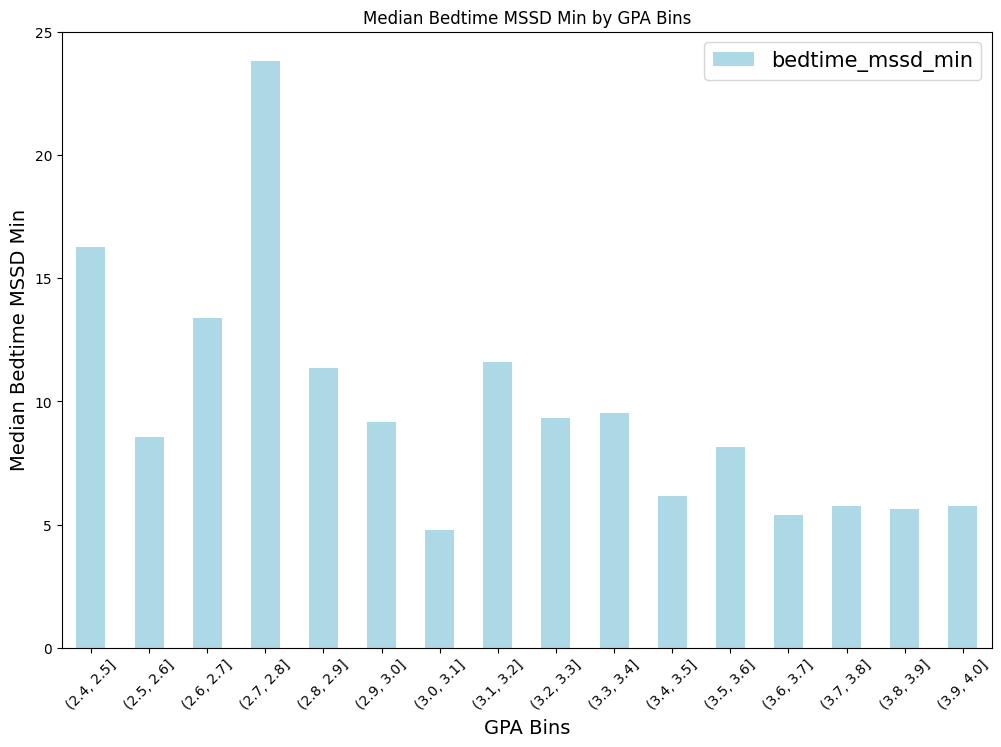

In [114]:
bar_gpa_bin(bin_num = 17, var = "bedtime_mssd_min", data = df, title = "Bedtime MSSD Min", min_gpa = 2.4, max_gpa = 4)

In [86]:
# Function to create bar graph looking at median of a variable based for each school based on GPA bins
def bar_gpa_bin_school(bin_num, var, data, title, min_gpa, max_gpa):
    
    # Create bins
    bins = np.linspace(min_gpa, max_gpa, num=bin_num, endpoint=True)

    # Bin the data
    data["gpa_bins"] = pd.cut(data["term_gpa"], bins = bins)
    df_gpa_bins = data.dropna()

    # Calculate median bedtime mssd for each school and gpa bin
    median_bedtime = df_gpa_bins.groupby(["gpa_bins", "School"])[var].median().unstack()
    desired_order = ['Carnegie', 'Washington', 'Notre Dame']
    median_bedtime = median_bedtime[desired_order]

    # Plotting
    ax = median_bedtime.plot(kind='bar', figsize=(12, 8), color = ["lightcoral", "plum", "lightgreen"])
    ax.legend(fontsize = 15)
    ax.set_xlabel('GPA Bins', fontsize = 14)
    ax.set_ylabel(f"Median {title}", fontsize = 14)
    ax.set_title(f"Median {title} by GPA Bins and School")
    plt.xticks(rotation=45)
    return ax


C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\154021516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gpa_bins"] = pd.cut(data["term_gpa"], bins = bins)
C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\154021516.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bedtime = df_gpa_bins.groupby(["gpa_bins", "School"])[var].median().unstack()


<Axes: title={'center': 'Median Bedtime MSSD Min by GPA Bins and School'}, xlabel='GPA Bins', ylabel='Median Bedtime MSSD Min'>

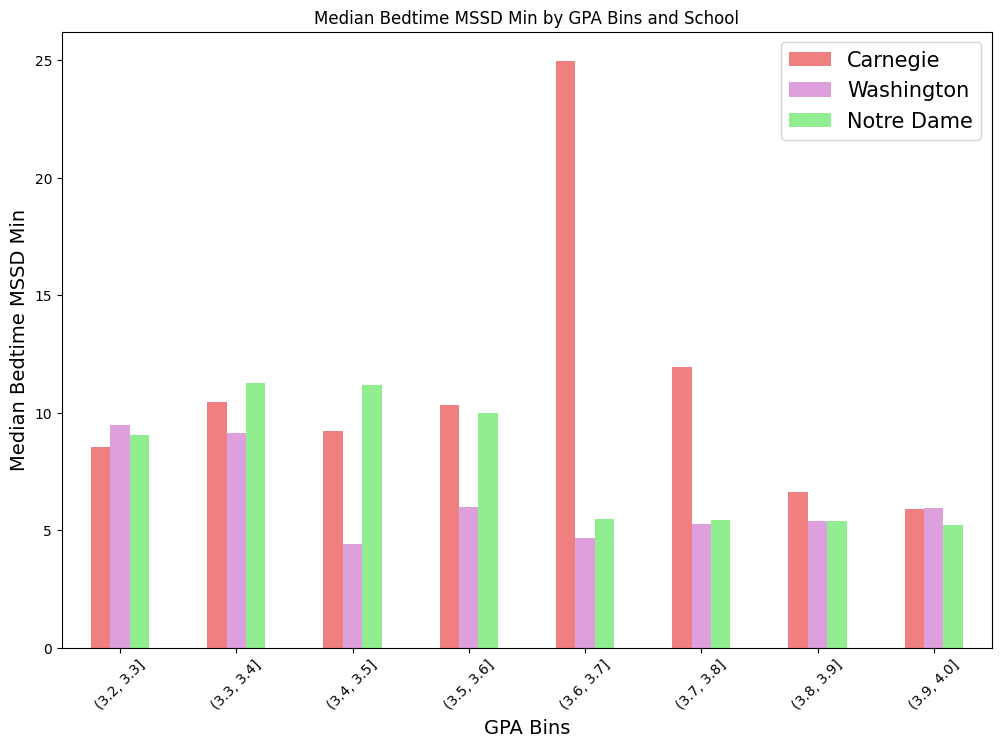

In [115]:
bar_gpa_bin_school(bin_num = 9, var = "bedtime_mssd_min", data = df, title = "Bedtime MSSD Min", min_gpa = 3.2, max_gpa = 4)

In [102]:
# Function to count the observations for bins
def gpa_bin_count_school(bin_num, data, var, min_gpa, max_gpa):
    # Create bins
    bins = np.linspace(min_gpa, max_gpa, num=bin_num, endpoint=True)

    # Bin the data
    data["gpa_bins"] = pd.cut(data["term_gpa"], bins = bins)
    df_gpa_bins = data.dropna(subset = ["term_gpa"])
    
    # Create the table
    table = pd.DataFrame(df_gpa_bins.groupby(["gpa_bins", "School"])[var].count().unstack())
    desired_order = ['Carnegie', 'Washington', 'Notre Dame']
    table = table[desired_order]
    table["Totals"] = table.sum(axis = 1)
    return table

C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\3505285331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gpa_bins"] = pd.cut(data["term_gpa"], bins = bins)
C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\3505285331.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bedtime = df_gpa_bins.groupby(["gpa_bins", "School"])[var].median().unstack()


<Axes: title={'center': 'Median Bedtime MSSD Min by GPA Bins and School'}, xlabel='GPA Bins', ylabel='Median Bedtime MSSD Min'>

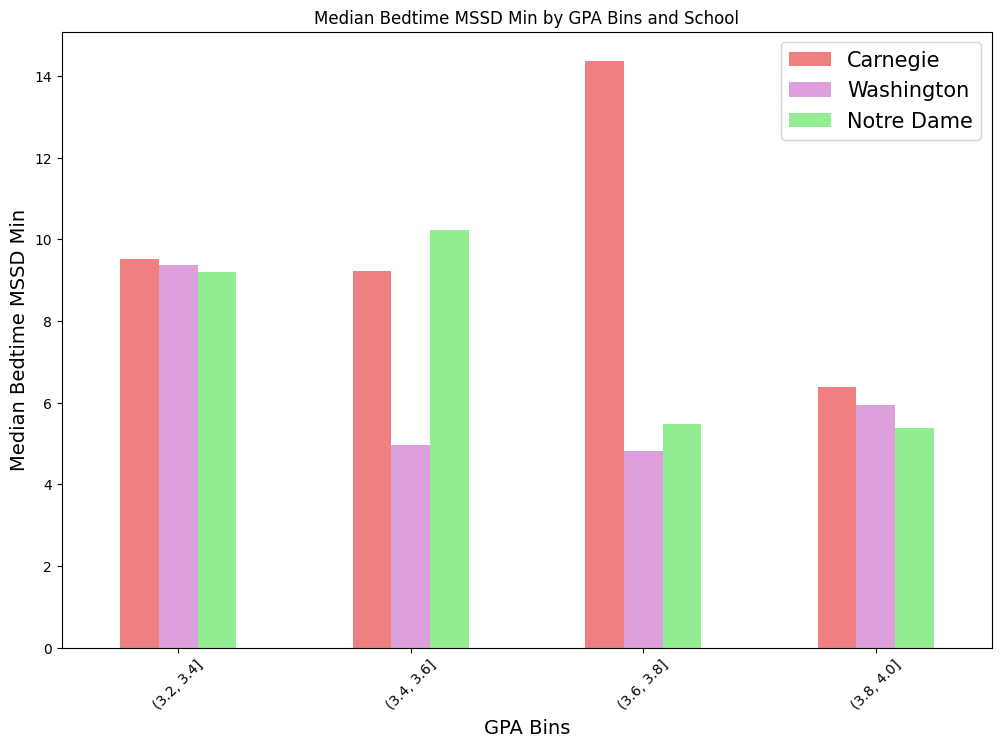

In [62]:
bar_gpa_bin_school(bin_num = 5, var = "bedtime_mssd_min", data = df, title = "Bedtime MSSD Min", min_gpa = 3.2, max_gpa = 4)

### Daytime Sleep

C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\1013852654.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gpa_bins"] = pd.cut(data["term_gpa"], bins = bins)
C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\1013852654.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bedtime = df_gpa_bins.groupby("gpa_bins")[var].median()


<Axes: title={'center': 'Median Daytime Sleep by GPA Bins'}, xlabel='GPA Bins', ylabel='Median Daytime Sleep'>

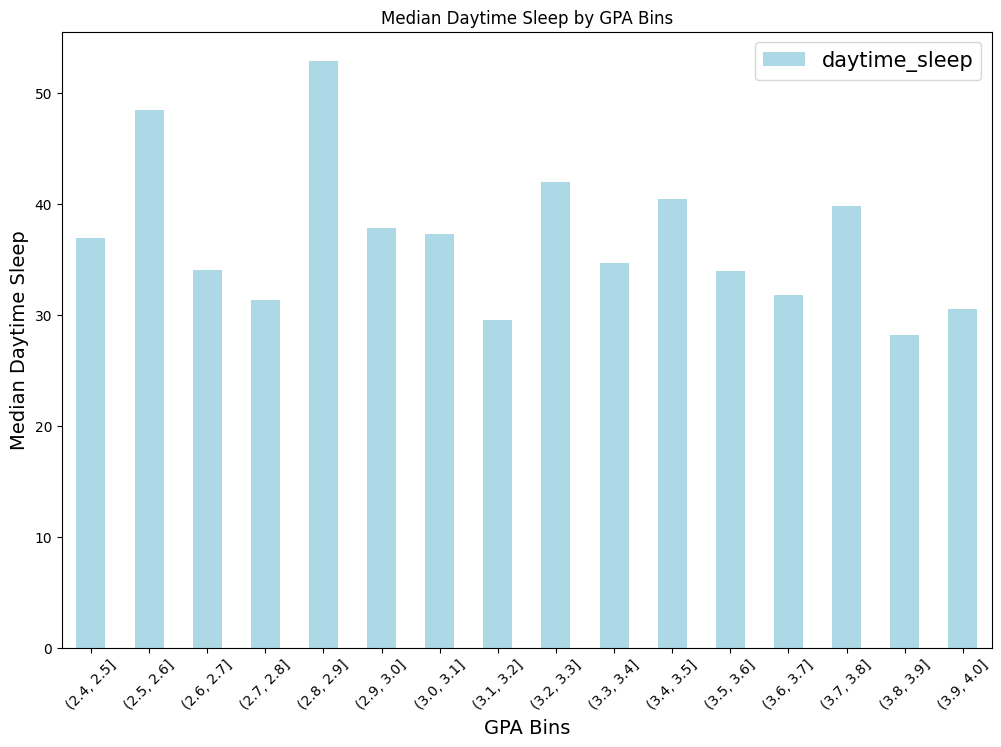

In [110]:
bar_gpa_bin(bin_num = 17, var = "daytime_sleep", data = df, title = "Daytime Sleep", min_gpa = 2.4, max_gpa = 4)

C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\154021516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gpa_bins"] = pd.cut(data["term_gpa"], bins = bins)
C:\Users\jaiti\AppData\Local\Temp\ipykernel_14712\154021516.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bedtime = df_gpa_bins.groupby(["gpa_bins", "School"])[var].median().unstack()


<Axes: title={'center': 'Median Daytime Sleep by GPA Bins and School'}, xlabel='GPA Bins', ylabel='Median Daytime Sleep'>

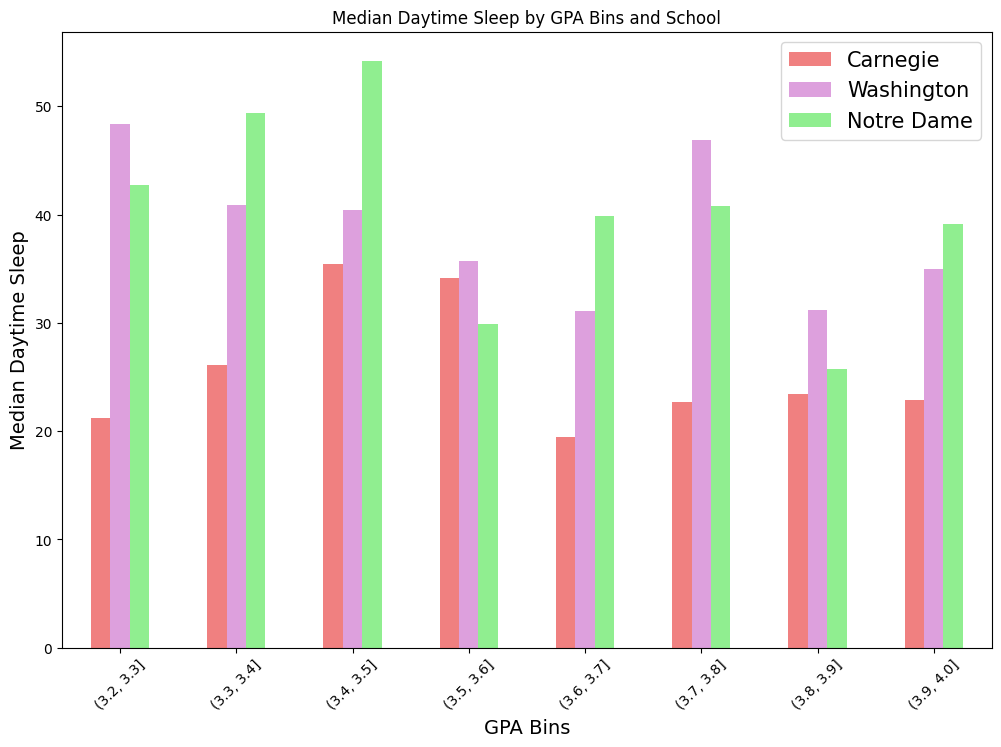

In [116]:
bar_gpa_bin_school(bin_num = 9, var = "daytime_sleep", data = df, title = "Daytime Sleep", min_gpa = 3.2, max_gpa = 4)